In [2]:
import PollingSystem as PS
import MarkovianRP as MRP
import StaticRP as SRP
import numpy as np

from matplotlib import pyplot as plt
from importlib import reload 

[0.15687464 0.42156439 0.42156096] 66.6608845729195
[0.20002344 0.39998828 0.39998828] 67.37296465860503
[0.18371052 0.40815221 0.40813727] 68.8041694456108
[0.22403188 0.38798406 0.38798406] 69.32211033160242
[0.22931717 0.38537947 0.38530336] 71.36819416220933
[0.26122273 0.36938864 0.36938864] 71.61678346679884
[0.25321798 0.3734017  0.37338032] 72.24794608725396
[0.27919024 0.36040488 0.36040488] 72.39354227793409
[0.27525568 0.36237255 0.36237177] 72.81734206955639
[0.29495766 0.35252117 0.35252117] 72.89265080764524
[0.29575068 0.35212466 0.35212466] 73.16260003050411
[0.30902534 0.34548733 0.34548733] 73.19351306977629
[0.31507016 0.34246492 0.34246492] 73.34185610233122
[0.32173542 0.33913229 0.33913229] 73.34902238855446
[0.33333333 0.33333333 0.33333333] 73.39594332551165
[0.33333333 0.33333333 0.33333333] 73.39594332551165
[0.35071048 0.32464483 0.32464469] 73.35443218516316
[0.34400169 0.32799915 0.32799915] 73.36065854114511
[0.36730845 0.31631544 0.31637612] 73.2392538564

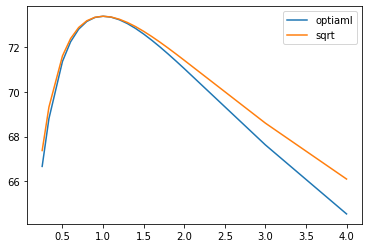

In [20]:
#vary along single axis, different lambda, same switching times
reload(PS)
beta = 1/16
base = beta*0.1
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
S = np.array([[ 0, 10, 10],
               [10, 0, 10],
               [10, 10, 0]])
S = S*4
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.25, 1/3,0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2,3,4])
for scale in scales:
    ps.Ls[0] = base*scale
    argmin, valmin = ps.calc_optimal_rp(S)
    print(argmin, valmin)
    opt_ws.append(valmin)
    pi = ps._opt_pi_equal_distances()
    rp = MRP.RandomRP(pi)
    wait = ps.calc_avg_wait(S,rp)
    print(pi, wait)
    sqrt_ws.append(wait)
    
    
plt.plot(scales, opt_ws, label="optiaml")
plt.plot(scales, sqrt_ws, label="sqrt")
plt.legend()




In [23]:
#vary along two axes, different lambda, same switching times
reload(PS)
beta = 1/16
base = beta*0.1
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
S = np.array([[ 0, 10, 10],
               [10, 0, 10],
               [10, 10, 0]])
S = S*4
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
ns = len(scales)
opt_ws = np.zeros((ns, ns))
sqrt_ws = np.zeros((ns, ns))

for i in range(ns):
    ps.Ls[0] = base*scales[i]
    for j in range(ns):
        ps.Ls[1] = base*scales[j]
        argmin, valmin = ps.calc_optimal_rp(S)
        opt_ws[i,j] = valmin
        
        pi = ps._opt_pi_equal_distances()
        rp = MRP.RandomRP(pi)
        wait = ps.calc_avg_wait(S,rp)
        sqrt_ws[i,j] = wait


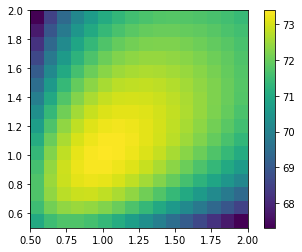

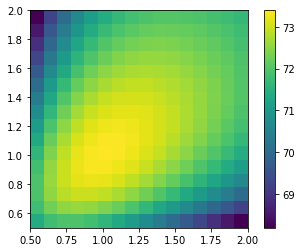

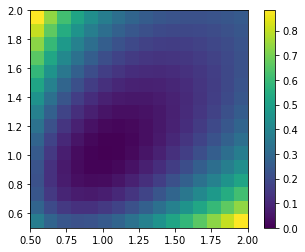

In [24]:
ws = plt.imshow(opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws-opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()


In [27]:
#vary along two axes, different lambda, different (but still symmetric) switching times
reload(PS)
beta = 1/16
base = beta*0.1
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
S = np.array([[ 0, 5, 10],
               [5, 0, 15],
               [10, 15, 0]])
S = S*1
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
ns = len(scales)
opt_ws = np.zeros((ns, ns))
sqrt_ws = np.zeros((ns, ns))

for i in range(ns):
    ps.Ls[0] = base*scales[i]
    for j in range(ns):
        ps.Ls[1] = base*scales[j]
        argmin, valmin = ps.calc_optimal_rp(S)
        opt_ws[i,j] = valmin
        
        pi = ps._opt_pi_equal_distances()
        rp = MRP.RandomRP(pi)
        wait = ps.calc_avg_wait(S,rp)
        sqrt_ws[i,j] = wait


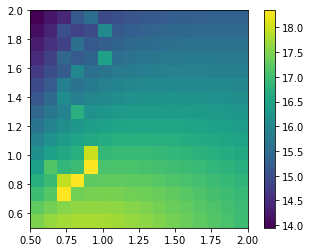

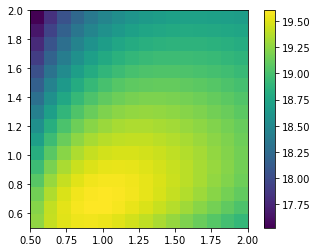

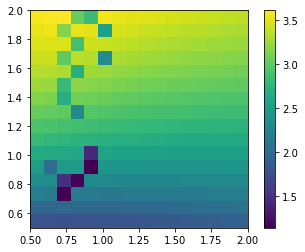

In [28]:
ws = plt.imshow(opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws-opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()
